PyTorch was developed by Meta (formerly Facebook) and has become one of the most trusted frameworks for machine learning. It’s known for its flexibility, intuitive Pythonic design, and powerful tools such as tensors, autograd, and GPU acceleration.

In this tutorial, we'll break down the key concepts of PyTorch step by step to help you build a solid foundation.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# The PyTorch Ecosystem: An LLM Perspective

PyTorch has a few core pillars. Here is how they map to NLP and LLM workflows:

- **torch.Tensor**: The raw data (token IDs).
- **torch.nn**: The layers (embeddings, transformers).
- **torch.autograd**: The gradient calculator.
- **torch.optim**: The weight updater (AdamW).
- **torch.utils.data**: The batcher (DataLoaders).

<!-- VISUAL: PYTORCH_ECOSYSTEM_FLOW -->


# PyTorch Tensors - The Foundation

Tensors are the fundamental data structures in PyTorch. Think of them as NumPy arrays but **can run on GPU and track gradients**

Tensors are how data flows through neural networks—so understanding them is key.

## Creating Tensors

In [5]:
# Creating tensors
print("1.1 Creating Tensors:")
# From lists
tensor_from_list = torch.tensor([1, 2, 3, 4, 5])
print(f"From list: {tensor_from_list}")

# Zeros and ones
zeros_tensor = torch.zeros(3, 4)
ones_tensor = torch.ones(2, 3)
print(f"Zeros tensor shape: {zeros_tensor.shape}")
print(f"Zeros tensor: {zeros_tensor}")
print(f"Ones tensor shape: {ones_tensor.shape}")
print(f"Ones tensor: {ones_tensor}")

# Random tensors
random_tensor = torch.randn(2, 3)  # Normal distribution
uniform_tensor = torch.rand(2, 3)  # Uniform [0,1]
print(f"Random tensor (normal):\n{random_tensor}")
print(f"Random tensor (uniform):\n{uniform_tensor}")

# From NumPy
numpy_array = np.array([1, 2, 3, 4])
tensor_from_numpy = torch.from_numpy(numpy_array)
print(f"From NumPy: {tensor_from_numpy}")

1.1 Creating Tensors:
From list: tensor([1, 2, 3, 4, 5])
Zeros tensor shape: torch.Size([3, 4])
Zeros tensor: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
Ones tensor shape: torch.Size([2, 3])
Ones tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]])
Random tensor (normal):
tensor([[ 0.0997, -0.3963,  0.8345],
        [-0.0778,  1.4012,  0.4258]])
Random tensor (uniform):
tensor([[0.8249, 0.6140, 0.9411],
        [0.4116, 0.7024, 0.6120]])
From NumPy: tensor([1, 2, 3, 4])


## Tensor Properties

In [56]:
print("\n1.2 Tensor Properties:")
sample_tensor = torch.randn(3, 4, 5)
print(f"Shape: {sample_tensor.shape}")
print(f"Data type: {sample_tensor.dtype}")
print(f"Device: {sample_tensor.device}")
print(f"Number of dimensions: {sample_tensor.ndim}")
print(f"Total elements: {sample_tensor.numel()}")


1.2 Tensor Properties:
Shape: torch.Size([3, 4, 5])
Data type: torch.float32
Device: cpu
Number of dimensions: 3
Total elements: 60


## Tensor Operations

### Basic Operations

In [57]:
# Basic operations
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print("1.3 Element-wise Operations:")
print(f"a = {a}")
print(f"b = {b}")
print(f"a + b = {a + b}")
print(f"a - b = {a - b}")
print(f"a * b = {a * b}")  # Element-wise multiplication
print(f"a / b = {a / b}")


1.3 Element-wise Operations:
a = tensor([1., 2., 3.])
b = tensor([4., 5., 6.])
a + b = tensor([5., 7., 9.])
a - b = tensor([-3., -3., -3.])
a * b = tensor([ 4., 10., 18.])
a / b = tensor([0.2500, 0.4000, 0.5000])


### Matrix Multiplication in Pytorch

In PyTorch, **matrix multiplication is the backbone of most tensor computations**. It’s essential for speed, scalability, and expressing the math behind deep learning

PyTorch supports matrix multiplication using several methods:

- `@` operator (Pythonic and preferred for readability)
- `torch.matmul()` (handles broadcasting and works for 1D, 2D, and batched tensors)
- `torch.mm()` (only for 2D matrices)

**Key differences:**

- `@` and `torch.matmul()` can handle batched multiplication (e.g., 3D tensors).
- `torch.mm()` is limited to 2D tensors and will raise an error for higher dimensions.

All methods require that the **inner dimensions match**. For example, if `A` has shape `(batch_size, m, n)` and `B` has shape `(batch_size, n, p)`, then `A @ B` returns a tensor of shape `(batch_size, m, p)`.

Always ensure that the inner dimensions match for matrix multiplication, e.g., `(m × n)` × `(n × p)` → `(m × p)`.

In [58]:
# Matrix multiplication
matrix1 = torch.randn(2, 3)
matrix2 = torch.randn(3, 4)
result = torch.mm(matrix1, matrix2)  # or matrix1 @ matrix2
print(f"Matrix1 shape: {matrix1.shape}")
print(f"Matrix2 shape: {matrix2.shape}")
print(f"Result shape: {result.shape}")

Matrix1 shape: torch.Size([2, 3])
Matrix2 shape: torch.Size([3, 4])
Result shape: torch.Size([2, 4])


### Reshaping Tensors for Matrix Multiplication

When tensor dimensions don’t align for matrix multiplication, reshaping is often required. PyTorch provides several methods:

- `.view(shape)` – Fast and memory-efficient, but only works on contiguous tensors.
- `.reshape(shape)` – More flexible than `.view()`, can handle non-contiguous tensors.
- `.unsqueeze(dim)` – Adds a dimension of size 1 (useful for promoting 1D tensors to 2D).
- `.squeeze(dim)` – Removes dimensions of size 1.
- `.flatten(start_dim, end_dim)` – Flattens dimensions into a single axis.


In [59]:
# Matrix reshaping
original = torch.randn(2, 3, 4)
reshaped = original.view(6, 4)  # view() creates a new view
flattened = original.flatten()   # flatten() to 1D
print(f"Original shape: {original.shape}")
print(f"Reshaped: {reshaped.shape}")
print(f"Flattened: {flattened.shape}")

Original shape: torch.Size([2, 3, 4])
Reshaped: torch.Size([6, 4])
Flattened: torch.Size([24])


### Tensor Indexing and Slicing in PyTorch

Tensor indexing and slicing in PyTorch works very similarly to NumPy.

#### Basic Indexing
- `x[i]` – Access the i-th element along the first dimension.
- `x[i, j]` – Access the element at row `i`, column `j`.
- `x[i, :]` – All columns of row `i`.
- `x[:, j]` – All rows of column `j`.

#### Slicing
- `x[start:stop]` – Slice along the first dimension.
- `x[:, start:stop]` – Slice along other dimensions.
- `x[..., j]` – Use `...` for flexible indexing (all leading dimensions).

#### Negative Indices
- `x[-1]` – Last element along the first dimension.
- `x[:, -2:]` – Last two columns.

#### Boolean Indexing
- `mask = x > 0`  
  `x[mask]` – Elements where the condition is `True`.


In [60]:
# Matrix indexing and slicing
tensor = torch.randn(4, 5)
print(f"Original tensor shape: {tensor.shape}")
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Submatrix [1:3, 2:4]: {tensor[1:3, 2:4].shape}")

Original tensor shape: torch.Size([4, 5])
First row: tensor([-0.4053, -1.4587, -1.4042, -1.5694, -0.7642])
First column: tensor([-0.4053, -1.2980, -0.3852, -1.9317])
Submatrix [1:3, 2:4]: torch.Size([2, 2])


# Automatic Differentiation (Autograd)

* Training a model requires calculating gradients. PyTorch handles this automatically using **Autograd**, its built-in automatic differentiation engine.

* By default, PyTorch does not track operations on tensors. To enable gradient tracking for training, you must explicitly set `requires_grad=True` when creating a tensor.

* Once enabled, PyTorch records all operations on that tensor to construct a computation graph.

* Calling `.backward()` method to ask `PyTorch` to calculate the gradients, which are then stored in the `grad` attribute.

Let's define a simple function and compute its gradients

In [61]:
# Create a tensor that requires gradients
x = torch.tensor([2.0], requires_grad=True)

# Define the function
y = x**2 + 3*x + 1
print(f"y = x² + 3x + 1")

# backpropagate to compute the gradient
y.backward()  

# Print the gradient dy/dx
print(f"dy/dx at x=2: {x.grad}")  

y = x² + 3x + 1
dy/dx at x=2: tensor([7.])


Multiple Variables

In [ ]:
# Create two tensors with requires_grad=True so we can compute gradients w.r.t. them
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = torch.tensor([3.0, 4.0], requires_grad=True)

# Compute a scalar z = x₁² + x₂² + y₁² + y₂²
z = torch.sum(x**2 + y**2)  

# Print the tensors and the computed scalar
print(f"x = {x}")
print(f"y = {y}")
print(f"z = sum(x² + y²)")

# Backpropagate to compute gradients dz/dx and dz/dy
z.backward()

# Print the gradients
print(f"dz/dx = {x.grad}")  # Should be [2*x₁, 2*x₂] = [2, 4]
print(f"dz/dy = {y.grad}")  # Should be [2*y₁, 2*y₂] = [6, 8]

x = tensor([1., 2.], requires_grad=True)
y = tensor([3., 4.], requires_grad=True)
z = sum(x² + y²)
dz/dx = tensor([2., 4.])
dz/dy = tensor([6., 8.])


`grad_fn` enables PyTorch’s **autograd engine** to:

- Trace the computation graph (a.k.a. dynamic computation graph)
- Perform automatic differentiation (backpropagation)


In [71]:
# Demonstrating grad_fn with a complex function
x = torch.tensor([2.0, -1.0, 0.5], requires_grad=True)

# Define a complex function: y = sin(x) * exp(x) + log(x**2 + 1)
y = torch.sin(x) * torch.exp(x) + torch.log(x**2 + 1)

print("y:", y)
print("y.grad_fn:", y.grad_fn)  # This shows the grad_fn of the output tensor

# If y is not a scalar, sum to get a scalar output for backward()
y_sum = y.sum()
print("y_sum.grad_fn:", y_sum.grad_fn)

y_sum.backward()
print("x.grad (after backward):", x.grad)

# Show the grad_fn chain for y
def print_grad_fn_chain(tensor):
    fn = tensor.grad_fn
    chain = []
    while fn is not None:
        chain.append(str(fn))
        if hasattr(fn, 'next_functions') and fn.next_functions:
            fn = fn.next_functions[0][0]
        else:
            break
    print("Grad_fn chain:")
    for f in chain:
        print("  ", f)

print_grad_fn_chain(y_sum)

y: tensor([8.3283, 0.3836, 1.0136], grad_fn=<AddBackward0>)
y.grad_fn: <AddBackward0 object at 0x000002C597D7EC80>
y_sum.grad_fn: <SumBackward0 object at 0x000002C597D7EC80>
x.grad (after backward): tensor([ 4.4439, -1.1108,  3.0373])
Grad_fn chain:


## Gradient Accumulation in PyTorch

- By default, **PyTorch accumulates gradients** in `.grad` fields — it does **not** overwrite them.
- This is also the reason why we need to run `zero_grad()` in every training iteration (more on this later). Otherwise our gradients would keep building up from one training iteration to the other, which would cause our updates to be wrong.

### When to call `zero_grad()`

For standard (non-accumulation) training loops:

```python
for batch in dataloader:
    optimizer.zero_grad()   # Clear old gradients
    loss = model(batch)
    loss.backward()         # Compute new gradients
    optimizer.step()        # Update model parameters

```

Here is an example:

In [74]:
x = torch.tensor([1.0], requires_grad=True)

# First computation
y1 = x**2
y1.backward()
print(f"After first backward: x.grad = {x.grad}")

After first backward: x.grad = tensor([2.])


In [75]:
# Second computation (gradients accumulate!)
y2 = x**3
y2.backward()
print(f"After second backward: x.grad = {x.grad}")

After second backward: x.grad = tensor([5.])


On the second backward pass, `x.grad` becomes `[5.]` because it **adds** the new gradient `3` (from `x³`) to the previous gradient `2` — so `2 + 3 = 5`.

✅ **Tip**: To avoid unintended accumulation, reset gradients between steps with:

In [39]:
# Clear gradients
x.grad.zero_()
print(f"After zeroing: x.grad = {x.grad}")

After zeroing: x.grad = tensor([0., 0.])


### When to Use Gradient Accumulation

**Gradient accumulation** is useful when your model or hardware cannot handle large batch sizes due to memory constraints.

Instead of updating model weights after every mini-batch, you can:
1. Perform multiple forward/backward passes over smaller mini-batches.
2. Accumulate gradients across these steps.
3. Call `optimizer.step()` once after several steps to simulate a larger batch update.

**Example:**  
If your target batch size is 64, but your GPU can only handle batch size 16, you can accumulate gradients over 4 steps:

```python
accum_steps = 4

for i, batch in enumerate(dataloader):
    loss = model(batch)
    loss.backward()  # Accumulate gradients

    if (i + 1) % accum_steps == 0:
        optimizer.step()        # Update model weights
        optimizer.zero_grad()   # Clear gradients for next accumulation cycle

```

# Data Loading and Preprocessing

In NLP, the raw data is text. We'll create a tiny sentiment dataset, build a vocabulary, and convert sentences into token IDs that an embedding layer can consume.

Since you've seen word2vec/GloVe, we'll also simulate pretrained vectors and plug them into `nn.Embedding` so the flow feels familiar.


Let's build a toy NLP dataset and convert it into tensors.


In [9]:
print("Creating Toy NLP Dataset:")
data = [
    ("I love this class", 1),
    ("Homework is hard", 0),
    ("PyTorch makes sense", 1),
    ("The lecture was confusing", 0),
    ("I enjoy coding in Python", 1),
    ("Deadlines are stressful", 0),
    ("Transformers are powerful", 1),
    ("I dislike debugging all night", 0),
    ("This tutorial is helpful", 1),
    ("The quiz was tricky", 0),
]

tokenized_texts = [text.lower().split() for text, _ in data]

vocab = {"<PAD>": 0, "<UNK>": 1}
for tokens in tokenized_texts:
    for token in tokens:
        if token not in vocab:
            vocab[token] = len(vocab)

vocab_size = len(vocab)
max_len = 6

def text_to_tensor(text, vocab, max_len):
    tokens = text.lower().split()
    ids = [vocab.get(token, vocab["<UNK>"]) for token in tokens]
    if len(ids) < max_len:
        ids = ids + [vocab["<PAD>"]] * (max_len - len(ids))
    else:
        ids = ids[:max_len]
    return ids

import random
random.seed(42)
random.shuffle(data)

train_end = int(0.7 * len(data))
val_end = int(0.85 * len(data))
train_data = data[:train_end]
val_data = data[train_end:val_end]
test_data = data[val_end:]

def build_tensors(split_data):
    texts = [text_to_tensor(text, vocab, max_len) for text, _ in split_data]
    labels = [label for _, label in split_data]
    return torch.LongTensor(texts), torch.FloatTensor(labels)

X_train_tensor, y_train_tensor = build_tensors(train_data)
X_val_tensor, y_val_tensor = build_tensors(val_data)
X_test_tensor, y_test_tensor = build_tensors(test_data)

print(f"Vocab size: {vocab_size}")
print(f"Max sequence length: {max_len}")
print(f"Training tensors: X={X_train_tensor.shape}, y={y_train_tensor.shape}")
print(f"Validation tensors: X={X_val_tensor.shape}, y={y_val_tensor.shape}")
print(f"Test tensors: X={X_test_tensor.shape}, y={y_test_tensor.shape}")
print(f"Label distribution (train): {torch.bincount(y_train_tensor.long())}")

# Stand-in for pretrained word vectors (e.g., word2vec/GloVe)
embed_dim = 16
pretrained_embeddings = torch.randn(vocab_size, embed_dim)


Creating Toy NLP Dataset:
Vocab size: 33
Max sequence length: 6
Training tensors: X=torch.Size([7, 6]), y=torch.Size([7])
Validation tensors: X=torch.Size([1, 6]), y=torch.Size([1])
Test tensors: X=torch.Size([2, 6]), y=torch.Size([2])
Label distribution (train): tensor([4, 3])


Then use `TensorDataset` to package your token IDs and labels together.


In [10]:
print("TensorDataset")
dataset = TensorDataset(X_train_tensor, y_train_tensor)
print(f"Dataset length: {len(dataset)}")
print(f"Sample item: {dataset[0]}")


TensorDataset
Dataset length: 7
Sample item: (tensor([ 2, 25, 26, 27, 28,  0]), tensor(0.))


## DataLoader

Then use DataLoader to efficiently iterate through token batches.

1. Batching
- `TensorDataset` just holds the data.
- `DataLoader` divides it into batches, which is crucial for training neural networks efficiently using mini-batch gradient descent.

2. Shuffling
- You can enable shuffling of data each epoch (e.g., `shuffle=True`), which helps improve generalization.

3. Parallel Loading
- `DataLoader` can use multiple worker threads (`num_workers`) to load data in parallel, improving performance for large datasets.

4. Automatic Iteration
- It returns an iterator, so you can use it in a `for` loop easily during training:

```python
for X_batch, y_batch in train_loader:
```


In [11]:
# Create data loader
batch_size = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

print(f"Number of batches: {len(dataloader)}")

# Iterate through batches
for batch_idx, (batch_x, batch_y) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}: X={batch_x.shape}, y={batch_y.shape}")
    if batch_idx == 2:  # Show first 3 batches
        break


Number of batches: 2
Batch 1: X=torch.Size([4, 6]), y=torch.Size([4])
Batch 2: X=torch.Size([3, 6]), y=torch.Size([3])


## Create a Custom Dataset

Use when loading from files, applying preprocessing, or handling complex logic.

`torch.utils.data.Dataset` is an **abstract class** representing a dataset.  
To create your own dataset, subclass `Dataset` and override the following two methods:

- `__len__`: Returns the size of the dataset, so that `len(dataset)` works.
- `__getitem__`: Supports indexing like `dataset[i]` to retrieve the *i-th* sample.


In [12]:
print("Custom Dataset:")

from torch.utils.data import Dataset

# Example of custom dataset class
class SimpleDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create custom dataset
custom_dataset = SimpleDataset(X_train_tensor, y_train_tensor)
custom_dataloader = DataLoader(custom_dataset, batch_size=4, shuffle=True)

print(f"Custom dataset length: {len(custom_dataset)}")
print(f"Custom dataloader batches: {len(custom_dataloader)}")


Custom Dataset:
Custom dataset length: 7
Custom dataloader batches: 2


# Neural Network Modules in PyTorch

PyTorch provides the `torch.nn` module to help you build and manage neural networks efficiently.

At the core is the `nn.Module` class, which you subclass to define your own models.

## Define Your Neural Network Architecture

- **`nn.Module`** is the base class for all neural network models.  
  Your model class must inherit from it.

- In the constructor (`__init__`), define the layers and activation functions.  
  Typically, layers and activations alternate (e.g., `Linear → ReLU → Linear`),  
  except for the final layer which often omits activation depending on the task.

- The **forward pass** is defined in the `forward()` method,  
  which specifies how the input data flows through the layers.

Example: A Bag-of-Words Classifier (Baby LLM)

`nn.Embedding` is the bridge between integer token IDs and floating-point math: it maps each token to a learned vector so downstream layers can operate in continuous space.


In [19]:
import torch.nn as nn

class BagOfWordsClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes, pretrained_embeddings=None):
        super().__init__()
        if pretrained_embeddings is None:
            self.embedding = nn.Embedding(vocab_size, embed_dim)
        else:
            self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=False)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        embedded = self.embedding(x)
        pooled = embedded.mean(dim=1)
        logits = self.fc(pooled)
        return logits


### Common Layers in `torch.nn`

| Layer Type       | Description                               |
|------------------|-------------------------------------------|
| `nn.Linear`      | Fully connected (dense) layer             |
| `nn.ReLU`        | Activation function (non-linear)          |
| `nn.RNN`         | Basic recurrent layer for sequences       |
| `nn.LSTM`        | Recurrent layer for sequences             |
| `nn.Dropout`     | Randomly zeroes elements during training  |
| `nn.BatchNorm`   | Normalizes input for stable training      |

### Common Activation Functions

- **Layers** (e.g., `Linear`, `Conv2d`) perform affine transformations:

 $$
  \text{output} = W x + b
 $$

- Without a **non-linear activation**, stacking multiple layers is equivalent to a single linear transformation — the model won't be able to learn complex patterns.

- **Activation functions** introduce non-linearity, allowing the model to approximate complex functions and decision boundaries.


| Function       | PyTorch Module         | Description                          |
|----------------|------------------------|--------------------------------------|
| ReLU           | `nn.ReLU()`            | Most widely used; replaces negatives with 0 |
| Sigmoid        | `nn.Sigmoid()`         | Squashes input to (0, 1); used in binary classification |
| Tanh           | `nn.Tanh()`            | Squashes input to (-1, 1); zero-centered |
| Leaky ReLU     | `nn.LeakyReLU()`       | Like ReLU but allows small gradient for negatives |
| Softmax        | `nn.Softmax(dim=1)`    | Converts output to probability distribution (multiclass classification) |
| GELU           | `nn.GELU()`            | Used in modern transformers; smooth alternative to ReLU |


Instantiate the neural network model with:

In [20]:
# - vocab size = vocab_size
# - embedding dimension = 16
# - output classes = 1 (binary sentiment)
num_classes = 1
model = BagOfWordsClassifier(vocab_size, embed_dim, num_classes, pretrained_embeddings)

# Print the model architecture
print(model)


SimpleNN(
  (fc1): Linear(in_features=100, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


output the model's architecture:

In [21]:
# use torchsummary to get a summary of the model
try:
    from torchsummary import summary

    class _SummaryWrapper(nn.Module):
        def __init__(self, model):
            super().__init__()
            self.model = model

        def forward(self, x):
            return self.model(x.long())

    summary(_SummaryWrapper(model), input_size=(max_len,))
except ImportError:
    print("torchsummary not installed. Skipping model summary.")
    print("You can install it using: pip install torchsummary")
except Exception as exc:
    print(f"torchsummary failed on embedding inputs: {exc}")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           6,464
              ReLU-2                   [-1, 64]               0
            Linear-3                   [-1, 10]             650
Total params: 7,114
Trainable params: 7,114
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


### Using `nn.Sequential` in PyTorch

For simple feedforward networks where layers are applied **in a fixed, linear order** (e.g., `Linear → ReLU → Linear`), `nn.Sequential` is a convenient and concise choice.


In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(100, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

However, `nn.Sequential` is **not suitable** when:

- You need **conditionals**, **loops**, or **multiple inputs/outputs** in the `forward()` pass.
- You want to **reuse layers** or apply layers in **non-sequential ways**.

In such cases, define a custom model by subclassing `nn.Module`, which gives you full control over the forward logic.

# Loss Functions and Optimization

## Loss Functions


Loss functions (also called **criteria**) measure how well the model's predictions match the true labels.  
They guide the model during training by providing the gradient used in backpropagation.

You can define a loss function in PyTorch using the `torch.nn` module:

```python
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
```

###  Commonly Used Loss Functions in PyTorch (Preferred)

| Task                      | Loss Function              | Output Shape                     | Notes                                                  |
|---------------------------|----------------------------|----------------------------------|--------------------------------------------------------|
| Binary classification     | `nn.BCEWithLogitsLoss()`   | `(batch_size, 1)`                |Combines `Sigmoid` + `BCELoss`             |
| Multiclass classification | `nn.CrossEntropyLoss()`    | `(batch_size, num_classes)`      |Includes `LogSoftmax` internally           |
| Regression                | `nn.MSELoss()`             | `(batch_size, 1)`                | Mean Squared Error (default choice for regression)     |
| Regression                | `nn.L1Loss()`              | `(batch_size, 1)`                | Mean Absolute Error, more robust to outliers           |


For classification

In [23]:
print("How to define loss functions and optimizers")
print("-" * 60)

print("5.1 Common Loss Functions:")
# Generate some dummy data
batch_size = 4
num_classes = 3

# For classification
predictions = torch.randn(batch_size, num_classes)
true_labels = torch.tensor([0, 1, 2, 1])  # class indices

print(f"Predictions shape: {predictions.shape}")
print(f"True labels: {true_labels}")

# Cross-entropy loss (for classification)
ce_loss = nn.CrossEntropyLoss()  # Automatically applies softmax
print(f"Cross-entropy loss function: {ce_loss}")
loss_value = ce_loss(predictions, true_labels)
print(f"Cross-entropy loss: {loss_value:.4f}")

How to define loss functions and optimizers
------------------------------------------------------------
5.1 Common Loss Functions:
Predictions shape: torch.Size([4, 3])
True labels: tensor([0, 1, 2, 1])
Cross-entropy loss function: CrossEntropyLoss()
Cross-entropy loss: 1.0840


For regression

In [24]:
# For regression
pred_values = torch.randn(batch_size, 1)
true_values = torch.randn(batch_size, 1)

# Mean squared error loss
mse_loss = nn.MSELoss()
mse_value = mse_loss(pred_values, true_values)
print(f"MSE loss: {mse_value:.4f}")

# Mean absolute error loss
mae_loss = nn.L1Loss()
mae_value = mae_loss(pred_values, true_values)
print(f"MAE loss: {mae_value:.4f}")

MSE loss: 0.8765
MAE loss: 0.8396


## Optimizers

Optimizers in PyTorch are used to **update model parameters** based on gradients computed during backpropagation.

They are part of `torch.optim` and are essential for training neural networks.

You must define the optimizer yourself in PyTorch. There is no default — this gives you full flexibility, but also full responsibility.

### Define the optimizer and pass in the model’s parameters

In [41]:
import torch.optim as optim

# Create a simple model
model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

print("Available optimizers:")
print("- SGD (Stochastic Gradient Descent)")
print("- RMSprop")
print("- Adam (Adaptive Moment Estimation)")
print("- AdamW (Adam with Weight Decay)")
print("- AdaGrad")

# Different optimizers
sgd_optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
rmsprop_optimizer = optim.RMSprop(model.parameters(), lr=0.01)
adam_optimizer = optim.Adam(model.parameters(), lr=0.001)
adamw_optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)


print(f"\nSGD optimizer: {sgd_optimizer}")
print(f"RMSprop optimizer: {rmsprop_optimizer}")
print(f"Adam optimizer: {adam_optimizer}")
print(f"AdamW optimizer: {adamw_optimizer}")


Available optimizers:
- SGD (Stochastic Gradient Descent)
- RMSprop
- Adam (Adaptive Moment Estimation)
- AdamW (Adam with Weight Decay)
- AdaGrad

SGD optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
RMSprop optimizer: RMSprop (
Parameter Group 0
    alpha: 0.99
    capturable: False
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    weight_decay: 0
)
Adam optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
AdamW optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: T

###  Optimizer Step in PyTorch

After choosing an optimizer, use `optimizer.step()` to **update the model parameters using the gradients computed during backpropagation**.

This step applies the gradient updates to the model’s weights, moving them in the direction that **minimizes the loss**.

####  Typical Workflow
```python
loss.backward()       # Compute gradients
optimizer.step()      # Update model parameters
optimizer.zero_grad() # Clear gradients before next step
```

Below is a simple training example

In [26]:
# Dummy training data
x_train = torch.randn(10, 5)
y_train = torch.randn(10, 1)

# Set up loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

print("Training step:")
print(f"Initial loss: {criterion(model(x_train), y_train).item():.4f}")

# One training step
optimizer.zero_grad()    # Clear gradients
outputs = model(x_train) # Forward pass
loss = criterion(outputs, y_train)  # Compute loss
loss.backward()          # Backward pass, compute gradients
optimizer.step()         # Update parameters

print(f"Loss after one step: {loss.item():.4f}")

Training step:
Initial loss: 0.5564
Loss after one step: 0.5564


# Model Inference

Inference is the process of using a trained model to make predictions on new, unseen data.
Unlike training, inference does not require gradient tracking or parameter updates. 

## Steps for inference

```python
# 1. Set model to evaluation mode
model.eval()

# 2. Disable gradient tracking
with torch.no_grad():
    # 3. Forward pass (X could be test data)
    predictions = model(X)
```

Using the simple training example above, here is the inference code

## Tensor Shapes in NLP

Text batches become 3D tensors once tokens are embedded.


In [14]:
# (Batch_Size, Sequence_Length, Embedding_Dimension)
dummy_batch = torch.randn(32, 10, 256)
print(f"NLP Batch Shape: {dummy_batch.shape}")


NLP Batch Shape: torch.Size([32, 10, 256])


<!-- VISUAL: TEXT_TO_NUMBERS_FLOW -->


# The Complete  Loop

Putting it all together - a full training example

In [45]:
print("Step 1: Data Preparation:")
print(f"Training data: {X_train_tensor.shape}")
print(f"Validation data: {X_val_tensor.shape}")
print(f"Test data: {X_test_tensor.shape}")

print("Step 2: Model Definition:")
vocab_size = len(vocab)
# embed_dim defined above for pretrained embeddings
num_classes = 1

model = BagOfWordsClassifier(vocab_size, embed_dim, num_classes, pretrained_embeddings)

print(f"Model:\n{model}")

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

print("Step 3: Training Setup:")
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01)

# Data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Batch size: 4")

print("Step 4: Training Loop:")
import matplotlib.pyplot as plt

num_epochs = 10
train_losses = []
val_losses = []

model.train()  # Set model to training mode

for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    num_train_batches = 0
    
    # Training loop
    for batch_x, batch_y in train_loader:
        logits = model(batch_x).squeeze(1)
        loss = criterion(logits, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
        num_train_batches += 1
    avg_train_loss = epoch_train_loss / max(1, num_train_batches)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()
    epoch_val_loss = 0.0
    num_val_batches = 0
    with torch.no_grad():
        for val_x, val_y in val_loader:
            val_logits = model(val_x).squeeze(1)
            val_loss = criterion(val_logits, val_y)
            epoch_val_loss += val_loss.item()
            num_val_batches += 1
    avg_val_loss = epoch_val_loss / max(1, num_val_batches)
    val_losses.append(avg_val_loss)
    model.train()

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


Step 1: Data Preparation:
Training data: torch.Size([722, 20])
Validation data: torch.Size([128, 20])
Test data: torch.Size([150, 20])
Step 2: Model Definition:
Model:
Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=64, out_features=32, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=32, out_features=2, bias=True)
)
Total parameters: 3490
Trainable parameters: 3490
Step 3: Training Setup:
Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Batch size: 32
Step 4: Training Loop:
Epoch [1/10], Train Loss: 0.6603, Val Loss: 0.6226
Epoch [2/10], Train Loss: 0.5872, Val Loss: 0.5201
Epoch [3/10], Train Loss: 0.4

Step 6: Visualizing Training:


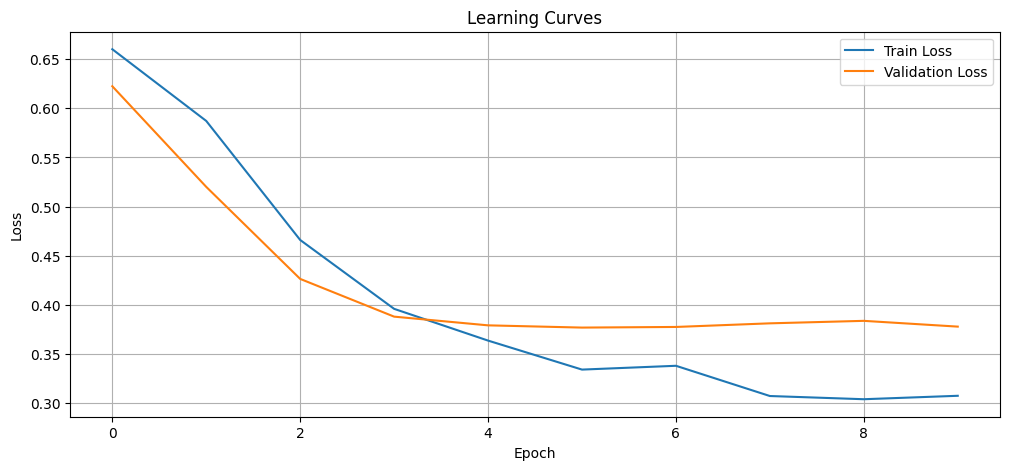

In [ ]:
print("Step 5: Visualizing Training:")
plt.figure(figsize=(12, 5))

# Plot learning curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


In [ ]:
print("Step 6: Evaluation:")
model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient computation
    test_logits = model(X_test_tensor).squeeze(1)
    test_loss = criterion(test_logits, y_test_tensor)

    # Calculate accuracy
    test_probs = torch.sigmoid(test_logits)
    predicted = (test_probs >= 0.5).long()
    correct = (predicted == y_test_tensor.long()).sum().item()
    accuracy = correct / len(y_test_tensor)

    print(f"Test Loss: {test_loss.item():.4f}")
    print(f"Test Accuracy: {accuracy:.4f} ({correct}/{len(y_test_tensor)})")


Step 5: Evaluation:
Test Loss: 0.2922
Test Accuracy: 0.8933 (134/150)


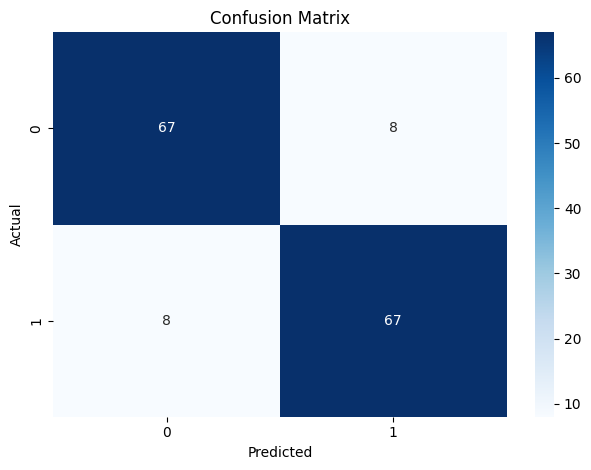

In [50]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_tensor.long().numpy(), predicted.numpy())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


# Model Saving and Loading

Saving a model lets you reuse it later — for inference, continuing training, or deployment — without retraining.

PyTorch provides flexible tools to save and load models.

## Saving Models in PyTorch

### Saving Models (Save the Model’s State Dictionary)

In [1]:
torch.save(model.state_dict(), 'model_weights.pth')

NameError: name 'torch' is not defined

- Saves only the model’s **learned parameters** (not architecture)  
- You must reconstruct the model when loading  
- ✅ Best practice for **inference**, **deployment**, and **cross-version safety**  

📁 Saved file: `'model_weights.pth'`


### Save a Training Checkpoint (for Resuming Training)

In [ ]:
checkpoint = {
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': train_losses[-1],
}

torch.save(checkpoint, 'checkpoint.pth')

- Saves everything needed to **resume training**  
- Includes:
  - Current epoch  
  - Model parameters  
  - Optimizer state  
  - Last recorded loss  
- ✅ Use this if you need to pause and resume training later  

📁 Saved file: `'checkpoint.pth'`


## Step 2: Loading Models

### Load the state dict

In [ ]:
# Load state dict (need to create model first)
new_model = BagOfWordsClassifier(vocab_size, embed_dim, num_classes)
new_model.load_state_dict(torch.load('model_weights.pth'))
print("✓ Loaded model weights into new model")


step 2: Loading Models:
✓ Loaded complete model
✓ Loaded model weights into new model
✓ Loaded checkpoint from epoch 10 with loss 0.2960


### Load the Checkpoint

In [ ]:
# Load checkpoint
checkpoint = torch.load('checkpoint.pth')
new_model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
print(f"✓ Loaded checkpoint from epoch {epoch} with loss {loss:.4f}")

##  Step 3: Inference with Loaded Model

In [31]:
# Step 3: Inference with Loaded Model
# Test that loaded model works
new_model.eval()
with torch.no_grad():
    sample_input = X_test_tensor[:5]  # First 5 test samples
    original_output = model(sample_input)
    loaded_output = new_model(sample_input)
    
    print("Outputs match:", torch.allclose(original_output, loaded_output))
    print(f"Original predictions: {torch.argmax(original_output, dim=1)}")
    print(f"Loaded predictions: {torch.argmax(loaded_output, dim=1)}")

Outputs match: True
Original predictions: tensor([1, 1, 1, 1, 1])
Loaded predictions: tensor([1, 1, 1, 1, 1])


# GPU Usage

PyTorch can train large models **much faster on a GPU than on a CPU**.
However, you must **explicitly move** both your model and data to the GPU device.

## Step 1: Check for GPU Availability

In [32]:
print("Step 1: Checking GPU Availability:")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device count: {torch.cuda.device_count()}")
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA not available - using CPU")

Step 1: Checking GPU Availability:
CUDA available: False
CUDA not available - using CPU


## Step 2:  Device Configuration

In [33]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Alternative way to check and set device
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using GPU")
else:
    device = torch.device('cpu')
    print("Using CPU")

Using device: cpu
Using CPU


## Step 3: Moving Tensors and Models to GPU:

In [34]:
print("step 3: Moving Tensors and Models to GPU:")
# Move tensors to device
sample_tensor = torch.randn(3, 4)
print(f"Original tensor device: {sample_tensor.device}")

sample_tensor = sample_tensor.to(device)
print(f"Tensor moved to: {sample_tensor.device}")

# Move model to device
model = model.to(device)
print(f"Model moved to: {next(model.parameters()).device}")

step 3: Moving Tensors and Models to GPU:
Original tensor device: cpu
Tensor moved to: cpu
Model moved to: cpu


## Step 4: Common Training Loop with GPU

In [35]:
print("step 4:  GPU Training Template:")
print("Template for GPU training:")
print("""
# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# In training loop:
for batch_x, batch_y in train_loader:
    # Move data to device
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)
    
    # Forward pass
    outputs = model(batch_x)
    loss = criterion(outputs, batch_y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
""")

step 4:  GPU Training Template:
Template for GPU training:

# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# In training loop:
for batch_x, batch_y in train_loader:
    # Move data to device
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)

    # Forward pass
    outputs = model(batch_x)
    loss = criterion(outputs, batch_y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



# Advanced Training Techniques in PyTorch

## Learning Rate Scheduling

### Learning rate affects convergence speed and stability

* A high learning rate might cause the model to overshoot the minimum and never converge.
* A low learning rate may result in slow learning or getting stuck in poor local minima.

### Different training phases need different step sizes

* In the early epochs, a **larger learning rate** helps make faster progress.

* In the later epochs, a **smaller learning rate** allows fine-tuning around the minimum.



A **learning rate scheduler** dynamically adjusts the learning rate during training. This helps models converge faster and generalize better

`ReduceLROnPlateau` is a learning rate scheduler in PyTorch that reduces the learning rate when a monitored metric has stopped improving on validation set. This adaptive approach helps models escape local minima and achieve better convergence.

Example: 
```python
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)

for epoch in range(num_epochs):
    train(...)
    val_loss = validate(...)
    scheduler.step(val_loss)
```


### Commom Schedulers

| Scheduler                  | Description                                  |
|---------------------------|----------------------------------------------|
| `StepLR`                  | Decreases LR by a factor every N epochs      |
| `ExponentialLR`           | Decays LR exponentially                      |
| `ReduceLROnPlateau`       | Reduces LR when a metric has stopped improving |
| `CosineAnnealingLR`       | Gradually lowers LR using cosine function     |
| `OneCycleLR`              | Popular for fast convergence and stable training |

##  Advanced Optimizers: AdamW

`AdamW` (Adam with decoupled Weight Decay) is an improved version of the standard Adam optimizer.  
It was introduced to **fix a flaw in how Adam handles weight decay**, leading to better generalization and training stability.


### Why Use AdamW?

- In regular `Adam`, weight decay is applied as L2 penalty on the gradients, which interferes with Adam's adaptive learning rate.
- `AdamW` **decouples weight decay** from the optimizer step and applies it **directly to the weights**, resulting in:
  - Better regularization
  - More stable and predictable convergence
  - Superior performance in many modern models


### When to Use AdamW

- When using **weight decay** as a regularizer
- When training **deep models**, including:
  - Transformer-based NLP models
  - ResNet and CNN architectures
- When combining with **learning rate schedulers** like `CosineAnnealingLR` or `OneCycleLR`


### How to Use in PyTorch

```python
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)
```

AdamW was introduced as part of a research improvement [(Loshchilov & Hutter, 2019)](https://arxiv.org/abs/1711.05101)

## Combine Learning rate decay, weight decay, and `AdamW`

```python
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

for epoch in range(num_epochs):
    train(...)
    scheduler.step()
```

✅ These tools are easy to integrate and can significantly boost model performance.